# Dependencies

In [ ]:
!pip install seaborn
!pip install matplotlib.pyplot
!pip install fuzzywuzzy
!pip install python-Levenshtein

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [ ]:
import numpy as np
import pandas as pd
# from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import accuracy_score
#from sklearn import tree
#from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
%matplotlib inline

#Automated Data Cleaning



## Add Elevation Path Here

In [ ]:
name_antenna = 'Canopy'

In [ ]:
ELEH = pd.read_csv('/content/drive/MyDrive/Task 3/Task 3/VP_450/Canopy 2x2 SM_Proto_1_0_Elev_Cut.csv', sep= ',', header=0)
name = 'Elevation H1'

In [ ]:
ELEV = pd.read_csv('/content/drive/MyDrive/Task 3/Task 3/HP_450/Canopy 2x2 SM_Proto_1_0_Elev_Cut.csv', sep= ',', header=0)
name1 = 'Elevation V1'

## Add Azimuth Path Here

In [ ]:
AZIH = pd.read_csv('/content/drive/MyDrive/Task 3/Task 3/HP_450/Canopy 2x2 SM_Proto_1_0.000000_Azi_Cut.csv', sep= ',', header=0)
name2 = 'Azimuth H1'

In [ ]:
AZIV = pd.read_csv('/content/drive/MyDrive/Task 3/Task 3/VP_450/Canopy 2x2 SM_Proto_1_0.000000_Azi_Cut.csv', sep= ',', header=0)
name3 = 'Azimuth V1'

## Pipelines

### Elevation H Data Cleaning

In [ ]:
# ELEH = pd.read_csv('/content/drive/MyDrive/DATA Raw/ELEHvation H1.csv', sep= ',', header=0)
DF_ELEH = ELEH[10:]
DF_ELEH.columns = ELEH.iloc[9]
DF_ELEH = DF_ELEH.reset_index(drop=True)
DF_ELEH

9    Frequency Port ID Port Name Pol. Axis Step Axis Scan Axis  \
0          NaN       1  VERTICAL        90         0      -180   
1          NaN       1  VERTICAL        90         0  -179.750   
2          NaN       1  VERTICAL        90         0  -179.500   
3          NaN       1  VERTICAL        90         0  -179.250   
4          NaN       1  VERTICAL        90         0      -179   
...        ...     ...       ...       ...       ...       ...   
2875       NaN       1  VERTICAL         0         0   178.750   
2876       NaN       1  VERTICAL         0         0       179   
2877       NaN       1  VERTICAL         0         0   179.250   
2878       NaN       1  VERTICAL         0         0   179.500   
2879       NaN       1  VERTICAL         0         0   179.750   

9    Gain in dB @ 5.100 GHz Gain in dB @ 5.125 GHz Gain in dB @ 5.150 GHz  \
0                   -12.747                -12.949                -13.749   
1                   -12.642                -12.757                -13.556   
2                   -12.571                -12.641                -13.384   
3                   -12.548                -12.553                -13.289   
4                   -12.580                -12.551                -13.259   
...                     ...                    ...                    ...   
2875                -14.274                -15.475                -16.236   
2876                -14.575                -15.774                -16.553   
2877                -14.877                -16.073                -16.804   
2878                -15.214                -16.463                -17.169   
2879                -15.604                -16.950                -17.580   

9    Gain in dB @ 5.175 GHz  ... Gain in dB @ 6.975 GHz Gain in dB @ 7 GHz  \
0                   -14.230  ...                -12.416            -12.435   
1                   -14.027  ...                -12.779            -12.785   
2                   -13.877  ...                -13.184            -13.099   
3                   -13.796  ...                -13.593            -13.478   
4                   -13.761  ...                -14.024            -13.823   
...                     ...  ...                    ...                ...   
2875                -17.298  ...                -22.138            -21.340   
2876                -17.721  ...                -21.476            -20.970   
2877                -18.122  ...                -20.984            -20.742   
2878                -18.590  ...                -20.683            -20.613   
2879                -18.993  ...                -20.503            -20.597   

9    Gain in dB @ 7.025 GHz Gain in dB @ 7.050 GHz Gain in dB @ 7.075 GHz  \
0                   -11.950                -11.011                 -9.821   
1                   -12.159                -11.142                 -9.863   
2                   -12.344                -11.273                 -9.945   
3                   -12.590                -11.412                 -9.987   
4                   -12.787                -11.552                -10.048   
...                     ...                    ...                    ...   
2875                -20.332                -19.525                -19.641   
2876                -20.016                -19.248                -19.500   
2877                -19.834                -19.096                -19.453   
2878                -19.759                -19.062                -19.504   
2879                -19.828                -19.166                -19.686   

9    Gain in dB @ 7.100 GHz Gain in dB @ 7.125 GHz Gain in dB @ 7.150 GHz  \
0                    -8.757                 -7.898                 -7.154   
1                    -8.718                 -7.852                 -7.151   
2                    -8.696                 -7.809                 -7.161   
3                    -8.671                 -7.841                 -7.203   
4                    -8.690        

In [ ]:
DF_ELEH = DF_ELEH.drop(['Frequency','Port ID','Port Name','Step Axis'], axis = 1)

In [ ]:
DF_ELEH

9    Pol. Axis Scan Axis Gain in dB @ 5.100 GHz Gain in dB @ 5.125 GHz  \
0           90      -180                -12.747                -12.949   
1           90  -179.750                -12.642                -12.757   
2           90  -179.500                -12.571                -12.641   
3           90  -179.250                -12.548                -12.553   
4           90      -179                -12.580                -12.551   
...        ...       ...                    ...                    ...   
2875         0   178.750                -14.274                -15.475   
2876         0       179                -14.575                -15.774   
2877         0   179.250                -14.877                -16.073   
2878         0   179.500                -15.214                -16.463   
2879         0   179.750                -15.604                -16.950   

9    Gain in dB @ 5.150 GHz Gain in dB @ 5.175 GHz Gain in dB @ 5.200 GHz  \
0                   -13.749                -14.230                -14.390   
1                   -13.556                -14.027                -14.209   
2                   -13.384                -13.877                -14.132   
3                   -13.289                -13.796                -14.054   
4                   -13.259                -13.761                -14.089   
...                     ...                    ...                    ...   
2875                -16.236                -17.298                -18.891   
2876                -16.553                -17.721                -19.350   
2877                -16.804                -18.122                -19.772   
2878                -17.169                -18.590                -20.295   
2879                -17.580                -18.993                -20.812   

9    Gain in dB @ 5.225 GHz Gain in dB @ 5.250 GHz Gain in dB @ 5.275 GHz  \
0                   -14.369                -13.952                -13.074   
1                   -14.281                -13.962                -13.197   
2                   -14.263                -13.992                -13.374   
3                   -14.253                -14.133                -13.581   
4                   -14.337                -14.281                -13.857   
...                     ...                    ...                    ...   
2875                -19.141                -18.966                -19.567   
2876                -19.528                -19.363                -19.930   
2877                -19.860                -19.751                -20.319   
2878                -20.228                -20.195                -20.776   
2879                -20.530                -20.578                -21.273   

9     ... Gain in dB @ 6.975 GHz Gain in dB @ 7 GHz Gain in dB @ 7.025 GHz  \
0     ...                -12.416            -12.435                -11.950   
1     ...                -12.779            -12.785                -12.159   
2     ...                -13.184            -13.099                -12.344   
3     ...                -13.593            -13.478                -12.590   
4     ...                -14.024            -13.823                -12.787   
...   ...                    ...                ...                    ...   
2875  ...                -22.138            -21.340                -20.332   
2876  ...                -21.476            -20.970                -20.016   
2877  ...                -20.984            -20.742                -19.834   
2878  ...                -20.683            -20.613                -19.759   
2879  ...                -20.503            -20.597                -19.828   

9    Gain in dB @ 7.050 GHz Gain in dB @ 7.075 GHz Gain in dB @ 7.100 GHz  \
0                   -11.011                 -9.821                 -8.757   
1                   -11.142                 -9.863                 -8.718   
2                   -11.273                 -9.945                 -8.696   
3               

### Elevation V Data Cleaning

In [ ]:
# ELEV = pd.read_csv('/content/drive/MyDrive/DATA Raw/ELEVvation H1.csv', sep= ',', header=0)
DF_ELEV = ELEV[10:]
DF_ELEV.columns = ELEV.iloc[9]
DF_ELEV = DF_ELEV.reset_index(drop=True)
DF_ELEV

9    Frequency Port ID   Port Name Pol. Axis Step Axis Scan Axis  \
0          NaN       1  HORIZONTAL         0         0      -180   
1          NaN       1  HORIZONTAL         0         0  -179.750   
2          NaN       1  HORIZONTAL         0         0  -179.500   
3          NaN       1  HORIZONTAL         0         0  -179.250   
4          NaN       1  HORIZONTAL         0         0      -179   
...        ...     ...         ...       ...       ...       ...   
2875       NaN       1  HORIZONTAL        90         0   178.750   
2876       NaN       1  HORIZONTAL        90         0       179   
2877       NaN       1  HORIZONTAL        90         0   179.250   
2878       NaN       1  HORIZONTAL        90         0   179.500   
2879       NaN       1  HORIZONTAL        90         0   179.750   

9    Gain in dB @ 5.100 GHz Gain in dB @ 5.125 GHz Gain in dB @ 5.150 GHz  \
0                   -16.567                -18.806                -19.687   
1                   -16.993                -19.402                -20.262   
2                   -17.559                -20.112                -21.015   
3                   -18.114                -20.981                -21.946   
4                   -18.972                -22.145                -23.207   
...                     ...                    ...                    ...   
2875                -22.716                -21.752                -23.124   
2876                -22.809                -21.830                -23.040   
2877                -22.847                -21.835                -22.965   
2878                -23.017                -21.920                -22.979   
2879                -23.270                -22.038                -23.029   

9    Gain in dB @ 5.175 GHz  ... Gain in dB @ 6.975 GHz Gain in dB @ 7 GHz  \
0                   -22.116  ...                -18.589            -20.088   
1                   -22.881  ...                -19.095            -20.517   
2                   -23.939  ...                -19.704            -21.109   
3                   -25.168  ...                -20.636            -21.957   
4                   -26.860  ...                -21.807            -23.069   
...                     ...  ...                    ...                ...   
2875                -24.199  ...                -19.865            -19.541   
2876                -24.029  ...                -19.816            -19.500   
2877                -23.985  ...                -19.739            -19.471   
2878                -23.999  ...                -19.663            -19.410   
2879                -24.105  ...                -19.587            -19.387   

9    Gain in dB @ 7.025 GHz Gain in dB @ 7.050 GHz Gain in dB @ 7.075 GHz  \
0                   -22.424                -25.152                -26.575   
1                   -22.635                -25.007                -26.186   
2                   -23.031                -25.181                -26.229   
3                   -23.689                -25.683                -26.677   
4                   -24.642                -26.523                -27.684   
...                     ...                    ...                    ...   
2875                -19.359                -18.442                -18.585   
2876                -19.313                -18.321                -18.476   
2877                -19.255                -18.223                -18.360   
2878                -19.215                -18.125                -18.264   
2879                -19.188                -18.051                -18.186   

9    Gain in dB @ 7.100 GHz Gain in dB @ 7.125 GHz Gain in dB @ 7.150 GHz  \
0                   -25.638                -23.897                -20.947   
1                   -25.560                -23.953                -21.011   
2                   -25.757                -24.313                -21.345   
3                   -26.337                -25.041                -21.966   
4          

In [ ]:
DF_ELEV = DF_ELEV.drop(['Frequency','Port ID','Port Name','Step Axis'], axis = 1)

In [ ]:
DF_ELEV

9    Pol. Axis Scan Axis Gain in dB @ 5.100 GHz Gain in dB @ 5.125 GHz  \
0            0      -180                -16.567                -18.806   
1            0  -179.750                -16.993                -19.402   
2            0  -179.500                -17.559                -20.112   
3            0  -179.250                -18.114                -20.981   
4            0      -179                -18.972                -22.145   
...        ...       ...                    ...                    ...   
2875        90   178.750                -22.716                -21.752   
2876        90       179                -22.809                -21.830   
2877        90   179.250                -22.847                -21.835   
2878        90   179.500                -23.017                -21.920   
2879        90   179.750                -23.270                -22.038   

9    Gain in dB @ 5.150 GHz Gain in dB @ 5.175 GHz Gain in dB @ 5.200 GHz  \
0                   -19.687                -22.116                -24.751   
1                   -20.262                -22.881                -25.938   
2                   -21.015                -23.939                -27.464   
3                   -21.946                -25.168                -29.498   
4                   -23.207                -26.860                -32.537   
...                     ...                    ...                    ...   
2875                -23.124                -24.199                -25.435   
2876                -23.040                -24.029                -25.089   
2877                -22.965                -23.985                -24.859   
2878                -22.979                -23.999                -24.728   
2879                -23.029                -24.105                -24.649   

9    Gain in dB @ 5.225 GHz Gain in dB @ 5.250 GHz Gain in dB @ 5.275 GHz  \
0                   -24.952                -22.948                -22.425   
1                   -25.992                -23.996                -23.640   
2                   -27.411                -25.295                -25.072   
3                   -29.346                -27.045                -26.795   
4                   -32.220                -29.473                -28.955   
...                     ...                    ...                    ...   
2875                -29.481                -32.767                -32.223   
2876                -28.505                -31.857                -32.911   
2877                -27.748                -30.991                -33.384   
2878                -27.082                -30.296                -33.511   
2879                -26.597                -29.727                -33.317   

9     ... Gain in dB @ 6.975 GHz Gain in dB @ 7 GHz Gain in dB @ 7.025 GHz  \
0     ...                -18.589            -20.088                -22.424   
1     ...                -19.095            -20.517                -22.635   
2     ...                -19.704            -21.109                -23.031   
3     ...                -20.636            -21.957                -23.689   
4     ...                -21.807            -23.069                -24.642   
...   ...                    ...                ...                    ...   
2875  ...                -19.865            -19.541                -19.359   
2876  ...                -19.816            -19.500                -19.313   
2877  ...                -19.739            -19.471                -19.255   
2878  ...                -19.663            -19.410                -19.215   
2879  ...                -19.587            -19.387                -19.188   

9    Gain in dB @ 7.050 GHz Gain in dB @ 7.075 GHz Gain in dB @ 7.100 GHz  \
0                   -25.152                -26.575                -25.638   
1                   -25.007                -26.186                -25.560   
2                   -25.181                -26.229                -25.757   
3               

### Azimuth H Cleaning Pipeline

In [ ]:
# AZIH = pd.read_csv('/content/drive/MyDrive/DATA Raw/AZIHmuth H2.csv', sep= ',', header=0)
DF_AZIH = AZIH[10:]
DF_AZIH.columns = AZIH.iloc[9]
DF_AZIH = DF_AZIH.reset_index(drop=True)
DF_AZIH

9    Frequency Port ID   Port Name Pol. Axis Step Axis Scan Axis  \
0          NaN       1  HORIZONTAL         0         0      -180   
1          NaN       1  HORIZONTAL         0         0  -179.750   
2          NaN       1  HORIZONTAL         0         0  -179.500   
3          NaN       1  HORIZONTAL         0         0  -179.250   
4          NaN       1  HORIZONTAL         0         0      -179   
...        ...     ...         ...       ...       ...       ...   
2875       NaN       1  HORIZONTAL        90         0   178.750   
2876       NaN       1  HORIZONTAL        90         0       179   
2877       NaN       1  HORIZONTAL        90         0   179.250   
2878       NaN       1  HORIZONTAL        90         0   179.500   
2879       NaN       1  HORIZONTAL        90         0   179.750   

9    Gain in dB @ 5.100 GHz Gain in dB @ 5.125 GHz Gain in dB @ 5.150 GHz  \
0                   -17.287                -19.301                -20.337   
1                   -17.459                -19.480                -20.551   
2                   -17.570                -19.766                -21.058   
3                   -17.746                -19.934                -21.426   
4                   -18.009                -20.362                -21.867   
...                     ...                    ...                    ...   
2875                -23.904                -24.370                -24.390   
2876                -23.641                -23.998                -23.519   
2877                -23.193                -23.352                -22.626   
2878                -22.653                -23.005                -21.907   
2879                -22.028                -22.216                -21.129   

9    Gain in dB @ 5.175 GHz  ... Gain in dB @ 6.975 GHz Gain in dB @ 7 GHz  \
0                   -25.794  ...                -16.450            -17.623   
1                   -26.168  ...                -16.523            -17.565   
2                   -26.706  ...                -16.557            -17.734   
3                   -27.326  ...                -16.702            -17.882   
4                   -27.870  ...                -16.905            -18.054   
...                     ...  ...                    ...                ...   
2875                -22.078  ...                -20.596            -18.955   
2876                -21.519  ...                -21.062            -19.350   
2877                -21.022  ...                -21.529            -19.826   
2878                -20.426  ...                -21.992            -20.326   
2879                -20.022  ...                -22.441            -20.906   

9    Gain in dB @ 7.025 GHz Gain in dB @ 7.050 GHz Gain in dB @ 7.075 GHz  \
0                   -20.057                -23.174                -28.043   
1                   -20.129                -23.432                -28.701   
2                   -20.339                -23.852                -29.729   
3                   -20.619                -24.517                -31.160   
4                   -21.056                -25.467                -32.798   
...                     ...                    ...                    ...   
2875                -19.084                -17.939                -18.944   
2876                -19.227                -18.134                -19.344   
2877                -19.391                -18.333                -19.709   
2878                -19.609                -18.588                -20.085   
2879                -19.871                -18.877                -20.487   

9    Gain in dB @ 7.100 GHz Gain in dB @ 7.125 GHz Gain in dB @ 7.150 GHz  \
0                   -24.498                -21.716                -18.658   
1                   -24.914                -22.046                -18.755   
2                   -25.425                -22.471                -19.066   
3                   -25.890                -22.972                -19.364   
4          

In [ ]:
DF_AZIH = DF_AZIH.drop(['Frequency','Port ID','Port Name','Step Axis'], axis = 1)

In [ ]:
DF_AZIH

9    Pol. Axis Scan Axis Gain in dB @ 5.100 GHz Gain in dB @ 5.125 GHz  \
0            0      -180                -17.287                -19.301   
1            0  -179.750                -17.459                -19.480   
2            0  -179.500                -17.570                -19.766   
3            0  -179.250                -17.746                -19.934   
4            0      -179                -18.009                -20.362   
...        ...       ...                    ...                    ...   
2875        90   178.750                -23.904                -24.370   
2876        90       179                -23.641                -23.998   
2877        90   179.250                -23.193                -23.352   
2878        90   179.500                -22.653                -23.005   
2879        90   179.750                -22.028                -22.216   

9    Gain in dB @ 5.150 GHz Gain in dB @ 5.175 GHz Gain in dB @ 5.200 GHz  \
0                   -20.337                -25.794                -26.742   
1                   -20.551                -26.168                -26.928   
2                   -21.058                -26.706                -27.321   
3                   -21.426                -27.326                -27.828   
4                   -21.867                -27.870                -28.415   
...                     ...                    ...                    ...   
2875                -24.390                -22.078                -23.136   
2876                -23.519                -21.519                -22.539   
2877                -22.626                -21.022                -22.012   
2878                -21.907                -20.426                -21.282   
2879                -21.129                -20.022                -20.829   

9    Gain in dB @ 5.225 GHz Gain in dB @ 5.250 GHz Gain in dB @ 5.275 GHz  \
0                   -27.016                -26.236                -26.512   
1                   -26.986                -26.047                -26.508   
2                   -27.013                -25.671                -26.201   
3                   -27.155                -25.360                -25.765   
4                   -27.319                -25.095                -25.213   
...                     ...                    ...                    ...   
2875                -25.654                -25.347                -27.492   
2876                -24.718                -24.490                -25.976   
2877                -23.855                -23.705                -24.751   
2878                -23.025                -22.988                -23.559   
2879                -22.222                -22.362                -22.747   

9     ... Gain in dB @ 6.975 GHz Gain in dB @ 7 GHz Gain in dB @ 7.025 GHz  \
0     ...                -16.450            -17.623                -20.057   
1     ...                -16.523            -17.565                -20.129   
2     ...                -16.557            -17.734                -20.339   
3     ...                -16.702            -17.882                -20.619   
4     ...                -16.905            -18.054                -21.056   
...   ...                    ...                ...                    ...   
2875  ...                -20.596            -18.955                -19.084   
2876  ...                -21.062            -19.350                -19.227   
2877  ...                -21.529            -19.826                -19.391   
2878  ...                -21.992            -20.326                -19.609   
2879  ...                -22.441            -20.906                -19.871   

9    Gain in dB @ 7.050 GHz Gain in dB @ 7.075 GHz Gain in dB @ 7.100 GHz  \
0                   -23.174                -28.043                -24.498   
1                   -23.432                -28.701                -24.914   
2                   -23.852                -29.729                -25.425   
3               

### Azimuth V Cleaning Pipeline

In [ ]:
# AZIV = pd.read_csv('/content/drive/MyDrive/DATA Raw/AZIVmuth H2.csv', sep= ',', header=0)
DF_AZIV = AZIV[10:]
DF_AZIV.columns = AZIV.iloc[9]
DF_AZIV = DF_AZIV.reset_index(drop=True)
DF_AZIV

9    Frequency Port ID Port Name Pol. Axis Step Axis Scan Axis  \
0          NaN       1  VERTICAL        90         0      -180   
1          NaN       1  VERTICAL        90         0  -179.750   
2          NaN       1  VERTICAL        90         0  -179.500   
3          NaN       1  VERTICAL        90         0  -179.250   
4          NaN       1  VERTICAL        90         0      -179   
...        ...     ...       ...       ...       ...       ...   
2875       NaN       1  VERTICAL         0         0   178.750   
2876       NaN       1  VERTICAL         0         0       179   
2877       NaN       1  VERTICAL         0         0   179.250   
2878       NaN       1  VERTICAL         0         0   179.500   
2879       NaN       1  VERTICAL         0         0   179.750   

9    Gain in dB @ 5.100 GHz Gain in dB @ 5.125 GHz Gain in dB @ 5.150 GHz  \
0                   -12.907                -12.561                -12.606   
1                   -13.109                -13.021                -13.061   
2                   -13.274                -13.442                -13.622   
3                   -13.422                -13.866                -14.204   
4                   -13.581                -14.169                -14.769   
...                     ...                    ...                    ...   
2875                -17.356                -18.060                -19.719   
2876                -17.441                -18.128                -19.974   
2877                -17.618                -18.210                -20.218   
2878                -17.750                -18.295                -20.422   
2879                -17.975                -18.377                -20.622   

9    Gain in dB @ 5.175 GHz  ... Gain in dB @ 6.975 GHz Gain in dB @ 7 GHz  \
0                   -12.805  ...                -12.225            -12.284   
1                   -13.089  ...                -12.573            -12.507   
2                   -13.512  ...                -13.048            -12.864   
3                   -14.003  ...                -13.607            -13.310   
4                   -14.595  ...                -14.272            -13.887   
...                     ...  ...                    ...                ...   
2875                -22.422  ...                -20.881            -20.160   
2876                -22.540  ...                -20.694            -20.085   
2877                -22.647  ...                -20.574            -20.007   
2878                -22.776  ...                -20.391            -20.031   
2879                -22.670  ...                -20.254            -19.966   

9    Gain in dB @ 7.025 GHz Gain in dB @ 7.050 GHz Gain in dB @ 7.075 GHz  \
0                   -12.304                -12.664                -12.289   
1                   -12.561                -13.085                -12.865   
2                   -12.909                -13.547                -13.486   
3                   -13.337                -14.132                -14.144   
4                   -13.911                -14.662                -14.870   
...                     ...                    ...                    ...   
2875                -20.629                -20.434                -20.870   
2876                -20.415                -20.231                -20.770   
2877                -20.235                -20.074                -20.613   
2878                -20.025                -19.895                -20.559   
2879                -19.905                -19.704                -20.357   

9    Gain in dB @ 7.100 GHz Gain in dB @ 7.125 GHz Gain in dB @ 7.150 GHz  \
0                   -11.146                 -9.827                 -9.458   
1                   -11.731                -10.373                -10.002   
2                   -12.400                -11.060                -10.585   
3                   -13.191                -11.866                -11.289   
4                   -14.065        

In [ ]:
DF_AZIV = DF_AZIV.drop(['Frequency','Port ID','Port Name','Step Axis'], axis = 1)

In [ ]:
DF_AZIV

9    Pol. Axis Scan Axis Gain in dB @ 5.100 GHz Gain in dB @ 5.125 GHz  \
0           90      -180                -12.907                -12.561   
1           90  -179.750                -13.109                -13.021   
2           90  -179.500                -13.274                -13.442   
3           90  -179.250                -13.422                -13.866   
4           90      -179                -13.581                -14.169   
...        ...       ...                    ...                    ...   
2875         0   178.750                -17.356                -18.060   
2876         0       179                -17.441                -18.128   
2877         0   179.250                -17.618                -18.210   
2878         0   179.500                -17.750                -18.295   
2879         0   179.750                -17.975                -18.377   

9    Gain in dB @ 5.150 GHz Gain in dB @ 5.175 GHz Gain in dB @ 5.200 GHz  \
0                   -12.606                -12.805                -15.462   
1                   -13.061                -13.089                -15.618   
2                   -13.622                -13.512                -15.826   
3                   -14.204                -14.003                -16.043   
4                   -14.769                -14.595                -16.428   
...                     ...                    ...                    ...   
2875                -19.719                -22.422                -20.713   
2876                -19.974                -22.540                -20.634   
2877                -20.218                -22.647                -20.637   
2878                -20.422                -22.776                -20.679   
2879                -20.622                -22.670                -20.563   

9    Gain in dB @ 5.225 GHz Gain in dB @ 5.250 GHz Gain in dB @ 5.275 GHz  \
0                   -17.464                -16.290                -16.087   
1                   -17.866                -17.324                -17.105   
2                   -18.138                -18.405                -18.198   
3                   -18.265                -19.343                -19.580   
4                   -18.232                -19.989                -21.248   
...                     ...                    ...                    ...   
2875                -21.944                -23.603                -22.473   
2876                -22.059                -23.641                -22.606   
2877                -21.935                -23.699                -22.840   
2878                -22.097                -23.623                -22.833   
2879                -22.230                -23.813                -23.033   

9     ... Gain in dB @ 6.975 GHz Gain in dB @ 7 GHz Gain in dB @ 7.025 GHz  \
0     ...                -12.225            -12.284                -12.304   
1     ...                -12.573            -12.507                -12.561   
2     ...                -13.048            -12.864                -12.909   
3     ...                -13.607            -13.310                -13.337   
4     ...                -14.272            -13.887                -13.911   
...   ...                    ...                ...                    ...   
2875  ...                -20.881            -20.160                -20.629   
2876  ...                -20.694            -20.085                -20.415   
2877  ...                -20.574            -20.007                -20.235   
2878  ...                -20.391            -20.031                -20.025   
2879  ...                -20.254            -19.966                -19.905   

9    Gain in dB @ 7.050 GHz Gain in dB @ 7.075 GHz Gain in dB @ 7.100 GHz  \
0                   -12.664                -12.289                -11.146   
1                   -13.085                -12.865                -11.731   
2                   -13.547                -13.486                -12.400   
3               

# Automated Data Extraction Pipeline

## Elevation H Pipeline

In [ ]:
data = pd.DataFrame(DF_ELEH)
data.head()

9 Pol. Axis Scan Axis Gain in dB @ 5.100 GHz Gain in dB @ 5.200 GHz  \
0        90      -180                -22.728                -23.438   
1        90    -179.5                -21.495                -22.748   
2        90      -179                -20.642                -22.057   
3        90    -178.5                -20.033                -21.587   
4        90      -178                -19.756                 -21.32   

9 Gain in dB @ 5.300 GHz Gain in dB @ 5.400 GHz Gain in dB @ 5.500 GHz  \
0                -26.219                -22.885                -20.573   
1                -26.074                -21.701                -19.157   
2                -26.237                -20.994                -18.235   
3                -26.786                -20.684                -17.745   
4                -27.581                -20.742                -17.768   

9 Gain in dB @ 5.600 GHz Gain in dB @ 5.700 GHz Gain in dB @ 5.800 GHz  ...  \
0                -24.162                -17.419                -21.222  ...   
1                -22.827                -16.813                -20.269  ...   
2                -22.019                -16.374                -19.625  ...   
3                -21.728                -16.305                -19.177  ...   
4                -22.069                -16.565                -19.138  ...   

9 Gain in dB @ 6.200 GHz Gain in dB @ 6.300 GHz Gain in dB @ 6.400 GHz  \
0                -18.947                -21.811                -22.518   
1                -18.534                -20.772                -20.441   
2                -18.673                -20.269                 -19.14   
3                -19.306                -20.236                -18.538   
4                -20.396                -20.544                 -18.58   

9 Gain in dB @ 6.500 GHz Gain in dB @ 6.600 GHz Gain in dB @ 6.700 GHz  \
0                -19.851                -19.614                -18.982   
1                -18.588                -18.419                -17.759   
2                -18.019                -18.071                -17.554   
3                -18.077                -18.385                -18.271   
4                -18.778                -19.319                 -19.67   

9 Gain in dB @ 6.800 GHz Gain in dB @ 6.900 GHz Gain in dB @ 7 GHz  \
0                 -16.79                -17.445            -17.952   
1                -15.586                -16.143             -16.52   
2                -15.224                -15.599            -16.084   
3                -15.684                -15.606            -16.406   
4                -16.921                 -16.35            -17.373   

9 Gain in dB @ 7.100 GHz  
0                -18.223  
1                -16.964  
2                -16.579  
3                -16.857  
4                -18.017  

[5 rows x 23 columns]

In [ ]:
data = data.convert_dtypes()

In [ ]:
data = data.astype('float64')

In [ ]:
data.shape

(1440, 23)

In [ ]:
data.dtypes

9
Pol. Axis                 float64
Scan Axis                 float64
Gain in dB @ 5.100 GHz    float64
Gain in dB @ 5.200 GHz    float64
Gain in dB @ 5.300 GHz    float64
Gain in dB @ 5.400 GHz    float64
Gain in dB @ 5.500 GHz    float64
Gain in dB @ 5.600 GHz    float64
Gain in dB @ 5.700 GHz    float64
Gain in dB @ 5.800 GHz    float64
Gain in dB @ 5.900 GHz    float64
Gain in dB @ 6 GHz        float64
Gain in dB @ 6.100 GHz    float64
Gain in dB @ 6.200 GHz    float64
Gain in dB @ 6.300 GHz    float64
Gain in dB @ 6.400 GHz    float64
Gain in dB @ 6.500 GHz    float64
Gain in dB @ 6.600 GHz    float64
Gain in dB @ 6.700 GHz    float64
Gain in dB @ 6.800 GHz    float64
Gain in dB @ 6.900 GHz    float64
Gain in dB @ 7 GHz        float64
Gain in dB @ 7.100 GHz    float64
dtype: object

In [ ]:
Gain = data.max()
Gain

9
Pol. Axis                  90.000
Scan Axis                 179.500
Gain in dB @ 5.100 GHz     19.121
Gain in dB @ 5.200 GHz     19.452
Gain in dB @ 5.300 GHz     19.168
Gain in dB @ 5.400 GHz     18.950
Gain in dB @ 5.500 GHz     17.888
Gain in dB @ 5.600 GHz     18.614
Gain in dB @ 5.700 GHz     19.078
Gain in dB @ 5.800 GHz     18.606
Gain in dB @ 5.900 GHz     18.765
Gain in dB @ 6 GHz         18.214
Gain in dB @ 6.100 GHz     18.319
Gain in dB @ 6.200 GHz     17.970
Gain in dB @ 6.300 GHz     17.178
Gain in dB @ 6.400 GHz     18.142
Gain in dB @ 6.500 GHz     17.272
Gain in dB @ 6.600 GHz     18.039
Gain in dB @ 6.700 GHz     18.514
Gain in dB @ 6.800 GHz     18.524
Gain in dB @ 6.900 GHz     18.200
Gain in dB @ 7 GHz         17.189
Gain in dB @ 7.100 GHz     15.994
dtype: float64

In [ ]:
Gain = Gain.drop(index=Gain.index[0:2], axis=0)

In [ ]:
GainIndex = data.idxmax()
GainIndex

9
Pol. Axis                   0
Scan Axis                 719
Gain in dB @ 5.100 GHz    358
Gain in dB @ 5.200 GHz    358
Gain in dB @ 5.300 GHz    358
Gain in dB @ 5.400 GHz    358
Gain in dB @ 5.500 GHz    358
Gain in dB @ 5.600 GHz    358
Gain in dB @ 5.700 GHz    358
Gain in dB @ 5.800 GHz    358
Gain in dB @ 5.900 GHz    358
Gain in dB @ 6 GHz        358
Gain in dB @ 6.100 GHz    358
Gain in dB @ 6.200 GHz    358
Gain in dB @ 6.300 GHz    358
Gain in dB @ 6.400 GHz    357
Gain in dB @ 6.500 GHz    358
Gain in dB @ 6.600 GHz    358
Gain in dB @ 6.700 GHz    358
Gain in dB @ 6.800 GHz    358
Gain in dB @ 6.900 GHz    358
Gain in dB @ 7 GHz        357
Gain in dB @ 7.100 GHz    358
dtype: int64

In [ ]:
GainIndex = GainIndex.drop(index=GainIndex.index[0:2], axis=0)

In [ ]:
BeamSquint = data.loc[GainIndex, ["Scan Axis"]]
BeamSquint

9    Scan Axis
358       -1.0
358       -1.0
358       -1.0
358       -1.0
358       -1.0
358       -1.0
358       -1.0
358       -1.0
358       -1.0
358       -1.0
358       -1.0
358       -1.0
358       -1.0
357       -1.5
358       -1.0
358       -1.0
358       -1.0
358       -1.0
358       -1.0
357       -1.5
358       -1.0

In [ ]:
BeamSquint = BeamSquint.squeeze()
BeamSquint

358   -1.0
358   -1.0
358   -1.0
358   -1.0
358   -1.0
358   -1.0
358   -1.0
358   -1.0
358   -1.0
358   -1.0
358   -1.0
358   -1.0
358   -1.0
357   -1.5
358   -1.0
358   -1.0
358   -1.0
358   -1.0
358   -1.0
357   -1.5
358   -1.0
Name: Scan Axis, dtype: float64

In [ ]:
BeamSquint.index = ['5.100 GHz',
       '5.200 GHz', '5.300 GHz',
       '5.400 GHz', '5.500 GHz',
       '5.600 GHz', '5.700 GHz',
       '5.800 GHz', '5.900 GHz',
       '6 GHz', '6.100 GHz',
       '6.200 GHz', '6.300 GHz',
       '6.400 GHz', '6.500 GHz',
       '6.600 GHz', '6.700 GHz',
       '6.800 GHz', '6.900 GHz',
       '7 GHz', '7.100 GHz']
Gain.index = ['5.100 GHz',
       '5.200 GHz', '5.300 GHz',
       '5.400 GHz', '5.500 GHz',
       '5.600 GHz', '5.700 GHz',
       '5.800 GHz', '5.900 GHz',
       '6 GHz', '6.100 GHz',
       '6.200 GHz', '6.300 GHz',
       '6.400 GHz', '6.500 GHz',
       '6.600 GHz', '6.700 GHz',
       '6.800 GHz', '6.900 GHz',
       '7 GHz', '7.100 GHz']
GainIndex.index = ['5.100 GHz',
       '5.200 GHz', '5.300 GHz',
       '5.400 GHz', '5.500 GHz',
       '5.600 GHz', '5.700 GHz',
       '5.800 GHz', '5.900 GHz',
       '6 GHz', '6.100 GHz',
       '6.200 GHz', '6.300 GHz',
       '6.400 GHz', '6.500 GHz',
       '6.600 GHz', '6.700 GHz',
       '6.800 GHz', '6.900 GHz',
       '7 GHz', '7.100 GHz']

In [ ]:
df = pd.DataFrame({
    'GainIndex': GainIndex,
    'Gain': Gain,
    'BeamSquint': BeamSquint
})

In [ ]:
df

GainIndex    Gain  BeamSquint
5.100 GHz        358  19.121        -1.0
5.200 GHz        358  19.452        -1.0
5.300 GHz        358  19.168        -1.0
5.400 GHz        358  18.950        -1.0
5.500 GHz        358  17.888        -1.0
5.600 GHz        358  18.614        -1.0
5.700 GHz        358  19.078        -1.0
5.800 GHz        358  18.606        -1.0
5.900 GHz        358  18.765        -1.0
6 GHz            358  18.214        -1.0
6.100 GHz        358  18.319        -1.0
6.200 GHz        358  17.970        -1.0
6.300 GHz        358  17.178        -1.0
6.400 GHz        357  18.142        -1.5
6.500 GHz        358  17.272        -1.0
6.600 GHz        358  18.039        -1.0
6.700 GHz        358  18.514        -1.0
6.800 GHz        358  18.524        -1.0
6.900 GHz        358  18.200        -1.0
7 GHz            357  17.189        -1.5
7.100 GHz        358  15.994        -1.0

In [ ]:
# Create DataFrame
#df = pd.DataFrame(data)

BW = np.empty(21)

def numeric_similarity(num1, num2, max_diff):
    # Convert numbers to floats
    n1 = float(num1)
    n2 = float(num2)

    # Calculate absolute difference
    diff = abs(n1 - n2)

    # Calculate similarity as a percentage of the maximum allowed difference
    if diff > max_diff:
        return 0
    similarity = 100 * (1 - (diff / max_diff))
    return int(similarity)

# def sa(sa):
#     for s in sa
#     return s

def fuzzy_match_column(value, df, column, max_diff, index):
    # Convert the column to string
    choices = df.iloc[:,column].astype(str).tolist()
    scanaxis= df.iloc[:,index].astype(str).tolist()

    # Perform fuzzy matching using the custom similarity function
    results = [(choice, numeric_similarity(value, choice, max_diff), sa) for choice, sa in zip(choices,scanaxis)]

    # Filter results to include only those with a similarity greater than 0
    filtered_results = [(item, score, id) for item, score, id in results if score > 0]

    return filtered_results

i=0
while i<21:

  # Value to match
  value_to_match = (df.iloc[i,1]-3)


  # Maximum allowed difference
  max_diff = 1.25  # You can set this to any desired threshold


  # Perform matching
  matches = fuzzy_match_column(value_to_match, data, i+2, max_diff, 1)
  third_column = [item[2] for item in matches]

  arr = np.array(third_column)
  arr = arr.astype(float)
  arr= np.abs(arr)
  result = np.sum(arr)
  avg_BW = (result/len(arr))*2

  # avg_scnax = matches[2].mean()

  # Print results
  # print("Matching results:", i)
  # for match in matches:
  #     print(f"Value: {match[0]}, ScanAxis: {match[2]}, Similarity: {match[1]}")
  print(f"3db Beam Width of {i} = {(avg_BW)}")
  BW[i] = np.array(avg_BW)
  i+=1
BW = np.array(BW)

3db Beam Width of 0 = 5.0
3db Beam Width of 1 = 4.0
3db Beam Width of 2 = 5.0
3db Beam Width of 3 = 5.0
3db Beam Width of 4 = 4.5
3db Beam Width of 5 = 4.5
3db Beam Width of 6 = 3.6666666666666665
3db Beam Width of 7 = 5.0
3db Beam Width of 8 = 4.0
3db Beam Width of 9 = 4.0
3db Beam Width of 10 = 4.0
3db Beam Width of 11 = 4.0
3db Beam Width of 12 = 4.5
3db Beam Width of 13 = 3.3333333333333335
3db Beam Width of 14 = 3.0
3db Beam Width of 15 = 3.0
3db Beam Width of 16 = 3.5
3db Beam Width of 17 = 3.5
3db Beam Width of 18 = 3.5
3db Beam Width of 19 = 3.5
3db Beam Width of 20 = 4.0


In [ ]:
df = pd.DataFrame({
    # f'GainIndex {name}': GainIndex,
    f'Gain {name}': Gain,
    f'BeamSquint {name}': BeamSquint,
    f'3db BeamWidth {name}' : BW
})

In [ ]:
df.index= ['5.100 GHz',
       '5.200 GHz', '5.300 GHz',
       '5.400 GHz', '5.500 GHz',
       '5.600 GHz', '5.700 GHz',
       '5.800 GHz', '5.900 GHz',
       '6 GHz', '6.100 GHz',
       '6.200 GHz', '6.300 GHz',
       '6.400 GHz', '6.500 GHz',
       '6.600 GHz', '6.700 GHz',
       '6.800 GHz', '6.900 GHz',
       '7 GHz', '7.100 GHz']


## Elevation V Pipeline

In [ ]:
data1 = pd.DataFrame(DF_ELEV)
data1.head()

9 Pol. Axis Scan Axis Gain in dB @ 5.100 GHz Gain in dB @ 5.200 GHz  \
0         0      -180                -23.454                 -34.02   
1         0    -179.5                -23.794                 -35.85   
2         0      -179                -24.809                -36.909   
3         0    -178.5                -26.606                -33.449   
4         0      -178                -29.158                -29.292   

9 Gain in dB @ 5.300 GHz Gain in dB @ 5.400 GHz Gain in dB @ 5.500 GHz  \
0                -26.807                -28.642                -21.313   
1                 -25.94                 -27.67                -20.867   
2                -25.215                -26.909                -20.846   
3                -24.811                -26.463                -21.176   
4                -24.818                -26.466                -21.903   

9 Gain in dB @ 5.600 GHz Gain in dB @ 5.700 GHz Gain in dB @ 5.800 GHz  ...  \
0                -24.239                -30.223                -20.917  ...   
1                -23.484                -24.257                -20.243  ...   
2                -22.809                -20.991                -19.619  ...   
3                -22.314                -19.111                -19.144  ...   
4                -22.003                -18.306                -18.893  ...   

9 Gain in dB @ 6.200 GHz Gain in dB @ 6.300 GHz Gain in dB @ 6.400 GHz  \
0                -29.091                -25.349                -24.511   
1                -44.427                -20.407                -19.766   
2                -26.525                -17.214                -16.821   
3                -21.012                -15.172                -15.059   
4                -18.265                -14.155                -14.202   

9 Gain in dB @ 6.500 GHz Gain in dB @ 6.600 GHz Gain in dB @ 6.700 GHz  \
0                -21.089                -22.837                -21.265   
1                -18.356                -21.048                -21.452   
2                -16.617                 -19.65                -21.521   
3                -15.892                 -18.78                 -21.44   
4                -15.947                -18.689                -21.288   

9 Gain in dB @ 6.800 GHz Gain in dB @ 6.900 GHz Gain in dB @ 7 GHz  \
0                -32.872                -22.015            -29.375   
1                -28.817                 -21.49            -26.078   
2                 -26.42                -21.594            -23.755   
3                -24.807                -22.183            -22.842   
4                -23.482                -23.012            -23.178   

9 Gain in dB @ 7.100 GHz  
0                -30.653  
1                -21.586  
2                -17.743  
3                -15.913  
4                -15.453  

[5 rows x 23 columns]

In [ ]:
data1 = data1.convert_dtypes()

In [ ]:
data1 = data1.astype('float64')

In [ ]:
data1.shape

(1440, 23)

In [ ]:
data1.dtypes

9
Pol. Axis                 float64
Scan Axis                 float64
Gain in dB @ 5.100 GHz    float64
Gain in dB @ 5.200 GHz    float64
Gain in dB @ 5.300 GHz    float64
Gain in dB @ 5.400 GHz    float64
Gain in dB @ 5.500 GHz    float64
Gain in dB @ 5.600 GHz    float64
Gain in dB @ 5.700 GHz    float64
Gain in dB @ 5.800 GHz    float64
Gain in dB @ 5.900 GHz    float64
Gain in dB @ 6 GHz        float64
Gain in dB @ 6.100 GHz    float64
Gain in dB @ 6.200 GHz    float64
Gain in dB @ 6.300 GHz    float64
Gain in dB @ 6.400 GHz    float64
Gain in dB @ 6.500 GHz    float64
Gain in dB @ 6.600 GHz    float64
Gain in dB @ 6.700 GHz    float64
Gain in dB @ 6.800 GHz    float64
Gain in dB @ 6.900 GHz    float64
Gain in dB @ 7 GHz        float64
Gain in dB @ 7.100 GHz    float64
dtype: object

In [ ]:
Gain = data1.max()
Gain

9
Pol. Axis                  90.000
Scan Axis                 179.500
Gain in dB @ 5.100 GHz     17.311
Gain in dB @ 5.200 GHz     17.399
Gain in dB @ 5.300 GHz     18.024
Gain in dB @ 5.400 GHz     17.637
Gain in dB @ 5.500 GHz     17.686
Gain in dB @ 5.600 GHz     18.173
Gain in dB @ 5.700 GHz     17.382
Gain in dB @ 5.800 GHz     17.908
Gain in dB @ 5.900 GHz     17.952
Gain in dB @ 6 GHz         18.131
Gain in dB @ 6.100 GHz     17.841
Gain in dB @ 6.200 GHz     16.364
Gain in dB @ 6.300 GHz     17.321
Gain in dB @ 6.400 GHz     17.376
Gain in dB @ 6.500 GHz     17.231
Gain in dB @ 6.600 GHz     17.288
Gain in dB @ 6.700 GHz     17.637
Gain in dB @ 6.800 GHz     18.424
Gain in dB @ 6.900 GHz     17.607
Gain in dB @ 7 GHz         17.194
Gain in dB @ 7.100 GHz     17.147
dtype: float64

In [ ]:
Gain = Gain.drop(index=Gain.index[0:2], axis=0)

In [ ]:
GainIndex = data1.idxmax()
GainIndex

9
Pol. Axis                 720
Scan Axis                 719
Gain in dB @ 5.100 GHz    358
Gain in dB @ 5.200 GHz    358
Gain in dB @ 5.300 GHz    358
Gain in dB @ 5.400 GHz    358
Gain in dB @ 5.500 GHz    359
Gain in dB @ 5.600 GHz    358
Gain in dB @ 5.700 GHz    358
Gain in dB @ 5.800 GHz    358
Gain in dB @ 5.900 GHz    359
Gain in dB @ 6 GHz        358
Gain in dB @ 6.100 GHz    358
Gain in dB @ 6.200 GHz    359
Gain in dB @ 6.300 GHz    358
Gain in dB @ 6.400 GHz    358
Gain in dB @ 6.500 GHz    358
Gain in dB @ 6.600 GHz    358
Gain in dB @ 6.700 GHz    359
Gain in dB @ 6.800 GHz    358
Gain in dB @ 6.900 GHz    359
Gain in dB @ 7 GHz        358
Gain in dB @ 7.100 GHz    358
dtype: int64

In [ ]:
GainIndex = GainIndex.drop(index=GainIndex.index[0:2], axis=0)

In [ ]:
BeamSquint = data1.loc[GainIndex, ["Scan Axis"]]
BeamSquint

9    Scan Axis
358       -1.0
358       -1.0
358       -1.0
358       -1.0
359       -0.5
358       -1.0
358       -1.0
358       -1.0
359       -0.5
358       -1.0
358       -1.0
359       -0.5
358       -1.0
358       -1.0
358       -1.0
358       -1.0
359       -0.5
358       -1.0
359       -0.5
358       -1.0
358       -1.0

In [ ]:
BeamSquint = BeamSquint.squeeze()
BeamSquint

358   -1.0
358   -1.0
358   -1.0
358   -1.0
359   -0.5
358   -1.0
358   -1.0
358   -1.0
359   -0.5
358   -1.0
358   -1.0
359   -0.5
358   -1.0
358   -1.0
358   -1.0
358   -1.0
359   -0.5
358   -1.0
359   -0.5
358   -1.0
358   -1.0
Name: Scan Axis, dtype: float64

In [ ]:
BeamSquint.index = ['5.100 GHz',
       '5.200 GHz', '5.300 GHz',
       '5.400 GHz', '5.500 GHz',
       '5.600 GHz', '5.700 GHz',
       '5.800 GHz', '5.900 GHz',
       '6 GHz', '6.100 GHz',
       '6.200 GHz', '6.300 GHz',
       '6.400 GHz', '6.500 GHz',
       '6.600 GHz', '6.700 GHz',
       '6.800 GHz', '6.900 GHz',
       '7 GHz', '7.100 GHz']
Gain.index = ['5.100 GHz',
       '5.200 GHz', '5.300 GHz',
       '5.400 GHz', '5.500 GHz',
       '5.600 GHz', '5.700 GHz',
       '5.800 GHz', '5.900 GHz',
       '6 GHz', '6.100 GHz',
       '6.200 GHz', '6.300 GHz',
       '6.400 GHz', '6.500 GHz',
       '6.600 GHz', '6.700 GHz',
       '6.800 GHz', '6.900 GHz',
       '7 GHz', '7.100 GHz']
GainIndex.index = ['5.100 GHz',
       '5.200 GHz', '5.300 GHz',
       '5.400 GHz', '5.500 GHz',
       '5.600 GHz', '5.700 GHz',
       '5.800 GHz', '5.900 GHz',
       '6 GHz', '6.100 GHz',
       '6.200 GHz', '6.300 GHz',
       '6.400 GHz', '6.500 GHz',
       '6.600 GHz', '6.700 GHz',
       '6.800 GHz', '6.900 GHz',
       '7 GHz', '7.100 GHz']

In [ ]:
df1 = pd.DataFrame({
    'GainIndex': GainIndex,
    'Gain': Gain,
    'BeamSquint': BeamSquint
})

In [ ]:
df1

GainIndex    Gain  BeamSquint
5.100 GHz        358  17.311        -1.0
5.200 GHz        358  17.399        -1.0
5.300 GHz        358  18.024        -1.0
5.400 GHz        358  17.637        -1.0
5.500 GHz        359  17.686        -0.5
5.600 GHz        358  18.173        -1.0
5.700 GHz        358  17.382        -1.0
5.800 GHz        358  17.908        -1.0
5.900 GHz        359  17.952        -0.5
6 GHz            358  18.131        -1.0
6.100 GHz        358  17.841        -1.0
6.200 GHz        359  16.364        -0.5
6.300 GHz        358  17.321        -1.0
6.400 GHz        358  17.376        -1.0
6.500 GHz        358  17.231        -1.0
6.600 GHz        358  17.288        -1.0
6.700 GHz        359  17.637        -0.5
6.800 GHz        358  18.424        -1.0
6.900 GHz        359  17.607        -0.5
7 GHz            358  17.194        -1.0
7.100 GHz        358  17.147        -1.0

In [ ]:
# Create DataFrame
#df1 = pd.DataFrame(data)

BW = np.empty(21)

def numeric_similarity(num1, num2, max_diff):
    # Convert numbers to floats
    n1 = float(num1)
    n2 = float(num2)

    # Calculate absolute difference
    diff = abs(n1 - n2)

    # Calculate similarity as a percentage of the maximum allowed difference
    if diff > max_diff:
        return 0
    similarity = 100 * (1 - (diff / max_diff))
    return int(similarity)

# def sa(sa):
#     for s in sa
#     return s

def fuzzy_match_column(value, df1, column, max_diff, index):
    # Convert the column to string
    choices = df1.iloc[:,column].astype(str).tolist()
    scanaxis= df1.iloc[:,index].astype(str).tolist()

    # Perform fuzzy matching using the custom similarity function
    results = [(choice, numeric_similarity(value, choice, max_diff), sa) for choice, sa in zip(choices,scanaxis)]

    # Filter results to include only those with a similarity greater than 0
    filtered_results = [(item, score, id) for item, score, id in results if score > 0]

    return filtered_results

i=0
while i<21:

  # Value to match
  value_to_match = (df1.iloc[i,1]-3)


  # Maximum allowed difference
  max_diff = 1.25  # You can set this to any desired threshold


  # Perform matching
  matches = fuzzy_match_column(value_to_match, data1, i+2, max_diff, 1)
  third_column = [item[2] for item in matches]

  arr = np.array(third_column)
  arr = arr.astype(float)
  arr= np.abs(arr)
  result = np.sum(arr)
  avg_BW = (result/len(arr))*2

  # avg_scnax = matches[2].mean()

  # Print results
  # print("Matching results:", i)
  # for match in matches:
  #     print(f"Value: {match[0]}, ScanAxis: {match[2]}, Similarity: {match[1]}")
  print(f"3db Beam Width of {i} = {(avg_BW)}")
  BW[i] = np.array(avg_BW)
  i+=1
BW = np.array(BW)

3db Beam Width of 0 = 5.0
3db Beam Width of 1 = 5.0
3db Beam Width of 2 = 4.5
3db Beam Width of 3 = 5.0
3db Beam Width of 4 = 5.333333333333333
3db Beam Width of 5 = 4.5
3db Beam Width of 6 = 4.5
3db Beam Width of 7 = 4.5
3db Beam Width of 8 = 4.666666666666667
3db Beam Width of 9 = 3.6666666666666665
3db Beam Width of 10 = 3.6666666666666665
3db Beam Width of 11 = 4.666666666666667
3db Beam Width of 12 = 5.0
3db Beam Width of 13 = 4.0
3db Beam Width of 14 = 4.333333333333333
3db Beam Width of 15 = 4.333333333333333
3db Beam Width of 16 = 4.0
3db Beam Width of 17 = 3.5
3db Beam Width of 18 = 3.3333333333333335
3db Beam Width of 19 = 4.333333333333333
3db Beam Width of 20 = 3.5


In [ ]:
df1 = pd.DataFrame({
    # f'GainIndex {name1}': GainIndex,
    f'Gain {name1}': Gain,
    f'BeamSquint {name1}': BeamSquint,
    f'3db BeamWidth {name1}' : BW
})

In [ ]:
df1.index= ['5.100 GHz',
       '5.200 GHz', '5.300 GHz',
       '5.400 GHz', '5.500 GHz',
       '5.600 GHz', '5.700 GHz',
       '5.800 GHz', '5.900 GHz',
       '6 GHz', '6.100 GHz',
       '6.200 GHz', '6.300 GHz',
       '6.400 GHz', '6.500 GHz',
       '6.600 GHz', '6.700 GHz',
       '6.800 GHz', '6.900 GHz',
       '7 GHz', '7.100 GHz']


## Azimuth H Pipeline

In [ ]:
data2 = pd.DataFrame(DF_AZIH)
data2.head()

9 Pol. Axis Scan Axis Gain in dB @ 5.100 GHz Gain in dB @ 5.200 GHz  \
0        90      -180                -23.486                -27.223   
1        90    -179.5                -24.376                -28.182   
2        90      -179                -25.344                -29.178   
3        90    -178.5                -26.428                -30.122   
4        90      -178                -27.496                -30.841   

9 Gain in dB @ 5.300 GHz Gain in dB @ 5.400 GHz Gain in dB @ 5.500 GHz  \
0                 -27.64                -23.558                -17.553   
1                -28.352                -24.145                -17.902   
2                -28.955                -24.659                -18.374   
3                -29.371                -25.093                -18.858   
4                -29.425                -25.388                -19.432   

9 Gain in dB @ 5.600 GHz Gain in dB @ 5.700 GHz Gain in dB @ 5.800 GHz  ...  \
0                -21.665                -17.025                -16.886  ...   
1                -21.806                -17.511                -17.076  ...   
2                -21.845                -17.969                -17.282  ...   
3                -21.717                -18.425                -17.423  ...   
4                -21.455                -18.867                  -17.6  ...   

9 Gain in dB @ 6.200 GHz Gain in dB @ 6.300 GHz Gain in dB @ 6.400 GHz  \
0                -21.948                 -21.89                -19.723   
1                -22.384                -22.263                -20.041   
2                -22.879                -22.793                -20.454   
3                -23.444                -23.448                -20.973   
4                -24.052                -24.159                -21.574   

9 Gain in dB @ 6.500 GHz Gain in dB @ 6.600 GHz Gain in dB @ 6.700 GHz  \
0                -19.642                -19.148                -18.239   
1                -19.858                -19.337                -18.598   
2                -20.165                -19.614                -19.058   
3                -20.528                 -19.96                -19.635   
4                -20.938                 -20.37                -20.297   

9 Gain in dB @ 6.800 GHz Gain in dB @ 6.900 GHz Gain in dB @ 7 GHz  \
0                -16.774                -17.149            -17.388   
1                -16.901                -17.051            -17.213   
2                -17.161                -17.054            -17.143   
3                -17.533                -17.181            -17.184   
4                -17.972                -17.333            -17.291   

9 Gain in dB @ 7.100 GHz  
0                -19.997  
1                -19.842  
2                -19.833  
3                 -19.93  
4                -20.068  

[5 rows x 23 columns]

In [ ]:
data2 = data2.convert_dtypes()

In [ ]:
data2 = data2.astype('float64')

In [ ]:
data2.shape

(1440, 23)

In [ ]:
data2.dtypes

9
Pol. Axis                 float64
Scan Axis                 float64
Gain in dB @ 5.100 GHz    float64
Gain in dB @ 5.200 GHz    float64
Gain in dB @ 5.300 GHz    float64
Gain in dB @ 5.400 GHz    float64
Gain in dB @ 5.500 GHz    float64
Gain in dB @ 5.600 GHz    float64
Gain in dB @ 5.700 GHz    float64
Gain in dB @ 5.800 GHz    float64
Gain in dB @ 5.900 GHz    float64
Gain in dB @ 6 GHz        float64
Gain in dB @ 6.100 GHz    float64
Gain in dB @ 6.200 GHz    float64
Gain in dB @ 6.300 GHz    float64
Gain in dB @ 6.400 GHz    float64
Gain in dB @ 6.500 GHz    float64
Gain in dB @ 6.600 GHz    float64
Gain in dB @ 6.700 GHz    float64
Gain in dB @ 6.800 GHz    float64
Gain in dB @ 6.900 GHz    float64
Gain in dB @ 7 GHz        float64
Gain in dB @ 7.100 GHz    float64
dtype: object

In [ ]:
Gain = data2.max()
Gain

9
Pol. Axis                  90.000
Scan Axis                 179.500
Gain in dB @ 5.100 GHz     19.155
Gain in dB @ 5.200 GHz     19.523
Gain in dB @ 5.300 GHz     19.222
Gain in dB @ 5.400 GHz     18.973
Gain in dB @ 5.500 GHz     18.206
Gain in dB @ 5.600 GHz     18.634
Gain in dB @ 5.700 GHz     19.101
Gain in dB @ 5.800 GHz     18.615
Gain in dB @ 5.900 GHz     18.796
Gain in dB @ 6 GHz         18.204
Gain in dB @ 6.100 GHz     18.334
Gain in dB @ 6.200 GHz     17.977
Gain in dB @ 6.300 GHz     17.415
Gain in dB @ 6.400 GHz     18.143
Gain in dB @ 6.500 GHz     17.514
Gain in dB @ 6.600 GHz     18.349
Gain in dB @ 6.700 GHz     18.809
Gain in dB @ 6.800 GHz     19.205
Gain in dB @ 6.900 GHz     18.635
Gain in dB @ 7 GHz         17.583
Gain in dB @ 7.100 GHz     16.760
dtype: float64

In [ ]:
Gain = Gain.drop(index=Gain.index[0:2], axis=0)

In [ ]:
GainIndex = data2.idxmax()
GainIndex

9
Pol. Axis                   0
Scan Axis                 719
Gain in dB @ 5.100 GHz    363
Gain in dB @ 5.200 GHz    367
Gain in dB @ 5.300 GHz    367
Gain in dB @ 5.400 GHz    362
Gain in dB @ 5.500 GHz    375
Gain in dB @ 5.600 GHz    362
Gain in dB @ 5.700 GHz    362
Gain in dB @ 5.800 GHz    362
Gain in dB @ 5.900 GHz    355
Gain in dB @ 6 GHz        359
Gain in dB @ 6.100 GHz    356
Gain in dB @ 6.200 GHz    357
Gain in dB @ 6.300 GHz    384
Gain in dB @ 6.400 GHz    351
Gain in dB @ 6.500 GHz    342
Gain in dB @ 6.600 GHz    345
Gain in dB @ 6.700 GHz    341
Gain in dB @ 6.800 GHz    340
Gain in dB @ 6.900 GHz    338
Gain in dB @ 7 GHz        336
Gain in dB @ 7.100 GHz    336
dtype: int64

In [ ]:
GainIndex = GainIndex.drop(index=GainIndex.index[0:2], axis=0)

In [ ]:
BeamSquint = data2.loc[GainIndex, ["Scan Axis"]]
BeamSquint

9    Scan Axis
363        1.5
367        3.5
367        3.5
362        1.0
375        7.5
362        1.0
362        1.0
362        1.0
355       -2.5
359       -0.5
356       -2.0
357       -1.5
384       12.0
351       -4.5
342       -9.0
345       -7.5
341       -9.5
340      -10.0
338      -11.0
336      -12.0
336      -12.0

In [ ]:
BeamSquint = BeamSquint.squeeze()
BeamSquint

363     1.5
367     3.5
367     3.5
362     1.0
375     7.5
362     1.0
362     1.0
362     1.0
355    -2.5
359    -0.5
356    -2.0
357    -1.5
384    12.0
351    -4.5
342    -9.0
345    -7.5
341    -9.5
340   -10.0
338   -11.0
336   -12.0
336   -12.0
Name: Scan Axis, dtype: float64

In [ ]:
BeamSquint.index = ['5.100 GHz',
       '5.200 GHz', '5.300 GHz',
       '5.400 GHz', '5.500 GHz',
       '5.600 GHz', '5.700 GHz',
       '5.800 GHz', '5.900 GHz',
       '6 GHz', '6.100 GHz',
       '6.200 GHz', '6.300 GHz',
       '6.400 GHz', '6.500 GHz',
       '6.600 GHz', '6.700 GHz',
       '6.800 GHz', '6.900 GHz',
       '7 GHz', '7.100 GHz']
Gain.index = ['5.100 GHz',
       '5.200 GHz', '5.300 GHz',
       '5.400 GHz', '5.500 GHz',
       '5.600 GHz', '5.700 GHz',
       '5.800 GHz', '5.900 GHz',
       '6 GHz', '6.100 GHz',
       '6.200 GHz', '6.300 GHz',
       '6.400 GHz', '6.500 GHz',
       '6.600 GHz', '6.700 GHz',
       '6.800 GHz', '6.900 GHz',
       '7 GHz', '7.100 GHz']
GainIndex.index = ['5.100 GHz',
       '5.200 GHz', '5.300 GHz',
       '5.400 GHz', '5.500 GHz',
       '5.600 GHz', '5.700 GHz',
       '5.800 GHz', '5.900 GHz',
       '6 GHz', '6.100 GHz',
       '6.200 GHz', '6.300 GHz',
       '6.400 GHz', '6.500 GHz',
       '6.600 GHz', '6.700 GHz',
       '6.800 GHz', '6.900 GHz',
       '7 GHz', '7.100 GHz']

In [ ]:
df2 = pd.DataFrame({
    'GainIndex': GainIndex,
    'Gain': Gain,
    'BeamSquint': BeamSquint
})

In [ ]:
df2

GainIndex    Gain  BeamSquint
5.100 GHz        363  19.155         1.5
5.200 GHz        367  19.523         3.5
5.300 GHz        367  19.222         3.5
5.400 GHz        362  18.973         1.0
5.500 GHz        375  18.206         7.5
5.600 GHz        362  18.634         1.0
5.700 GHz        362  19.101         1.0
5.800 GHz        362  18.615         1.0
5.900 GHz        355  18.796        -2.5
6 GHz            359  18.204        -0.5
6.100 GHz        356  18.334        -2.0
6.200 GHz        357  17.977        -1.5
6.300 GHz        384  17.415        12.0
6.400 GHz        351  18.143        -4.5
6.500 GHz        342  17.514        -9.0
6.600 GHz        345  18.349        -7.5
6.700 GHz        341  18.809        -9.5
6.800 GHz        340  19.205       -10.0
6.900 GHz        338  18.635       -11.0
7 GHz            336  17.583       -12.0
7.100 GHz        336  16.760       -12.0

In [ ]:
# Create DataFrame
#df2 = pd.DataFrame(data)

BW = np.empty(21)

def numeric_similarity(num1, num2, max_diff):
    # Convert numbers to floats
    n1 = float(num1)
    n2 = float(num2)

    # Calculate absolute difference
    diff = abs(n1 - n2)

    # Calculate similarity as a percentage of the maximum allowed difference
    if diff > max_diff:
        return 0
    similarity = 100 * (1 - (diff / max_diff))
    return int(similarity)

# def sa(sa):
#     for s in sa
#     return s

def fuzzy_match_column(value, df2, column, max_diff, index):
    # Convert the column to string
    choices = df2.iloc[:,column].astype(str).tolist()
    scanaxis= df2.iloc[:,index].astype(str).tolist()

    # Perform fuzzy matching using the custom similarity function
    results = [(choice, numeric_similarity(value, choice, max_diff), sa) for choice, sa in zip(choices,scanaxis)]

    # Filter results to include only those with a similarity greater than 0
    filtered_results = [(item, score, id) for item, score, id in results if score > 0]

    return filtered_results

i=0
while i<21:

  # Value to match
  value_to_match = (df2.iloc[i,1]-3)


  # Maximum allowed difference
  max_diff = 0.5  # You can set this to any desired threshold


  # Perform matching
  matches = fuzzy_match_column(value_to_match, data2, i+2, max_diff, 1)
  third_column = [item[2] for item in matches]

  arr = np.array(third_column)
  arr = arr.astype(float)
  arr= np.abs(arr)
  result = np.sum(arr)
  avg_BW = (result/len(arr))*2

  # avg_scnax = matches[2].mean()

  # Print results
  # print("Matching results:", i)
  # for match in matches:
  #     print(f"Value: {match[0]}, ScanAxis: {match[2]}, Similarity: {match[1]}")
  print(f"3db Beam Width of {i} = {(avg_BW)}")
  BW[i] = np.array(avg_BW)
  i+=1
BW = np.array(BW)

3db Beam Width of 0 = 54.65
3db Beam Width of 1 = 57.76190476190476
3db Beam Width of 2 = 61.75
3db Beam Width of 3 = 63.333333333333336
3db Beam Width of 4 = 67.33333333333333
3db Beam Width of 5 = 72.66666666666667
3db Beam Width of 6 = 72.0
3db Beam Width of 7 = 77.54545454545455
3db Beam Width of 8 = 74.94117647058823
3db Beam Width of 9 = 78.0
3db Beam Width of 10 = 78.17647058823529
3db Beam Width of 11 = 78.70588235294117
3db Beam Width of 12 = 80.66666666666667
3db Beam Width of 13 = 80.92
3db Beam Width of 14 = 81.26086956521739
3db Beam Width of 15 = 77.625
3db Beam Width of 16 = 76.73913043478261
3db Beam Width of 17 = 73.75
3db Beam Width of 18 = 76.85714285714286
3db Beam Width of 19 = 77.14285714285714
3db Beam Width of 20 = 76.26923076923077


In [ ]:
df2 = pd.DataFrame({
    # f'GainIndex {name2}': GainIndex,
    f'Gain {name2}': Gain,
    f'BeamSquint {name2}': BeamSquint,
    f'3db BeamWidth {name2}' : BW
})

In [ ]:
df2.index= ['5.100 GHz',
       '5.200 GHz', '5.300 GHz',
       '5.400 GHz', '5.500 GHz',
       '5.600 GHz', '5.700 GHz',
       '5.800 GHz', '5.900 GHz',
       '6 GHz', '6.100 GHz',
       '6.200 GHz', '6.300 GHz',
       '6.400 GHz', '6.500 GHz',
       '6.600 GHz', '6.700 GHz',
       '6.800 GHz', '6.900 GHz',
       '7 GHz', '7.100 GHz']


## Azimuth V Pipeline

In [ ]:
data3 = pd.DataFrame(DF_AZIV)
data3.head()

9 Pol. Axis Scan Axis Gain in dB @ 5.100 GHz Gain in dB @ 5.200 GHz  \
0         0      -180                  -28.2                -34.762   
1         0    -179.5                 -28.63                -32.902   
2         0      -179                -29.072                -31.418   
3         0    -178.5                -29.589                -30.284   
4         0      -178                -30.126                -29.337   

9 Gain in dB @ 5.300 GHz Gain in dB @ 5.400 GHz Gain in dB @ 5.500 GHz  \
0                 -30.89                -34.368                -23.116   
1                -32.397                 -35.61                 -22.33   
2                -33.705                -35.576                -21.621   
3                -34.534                -34.239                -20.959   
4                -34.673                -32.406                -20.363   

9 Gain in dB @ 5.600 GHz Gain in dB @ 5.700 GHz Gain in dB @ 5.800 GHz  ...  \
0                 -28.81                -19.277                -25.879  ...   
1                -30.296                -20.113                -27.062  ...   
2                -31.387                -21.011                -28.371  ...   
3                -31.667                -22.009                -29.795  ...   
4                -31.044                 -23.11                -31.229  ...   

9 Gain in dB @ 6.200 GHz Gain in dB @ 6.300 GHz Gain in dB @ 6.400 GHz  \
0                -19.418                -17.104                -14.722   
1                -19.595                -17.621                -15.085   
2                -19.797                 -18.13                -15.469   
3                -20.023                -18.647                -15.912   
4                -20.285                -19.177                -16.404   

9 Gain in dB @ 6.500 GHz Gain in dB @ 6.600 GHz Gain in dB @ 6.700 GHz  \
0                -15.553                 -26.17                -38.809   
1                -15.824                -26.848                -37.816   
2                -16.119                  -27.6                -36.183   
3                -16.429                -28.409                -34.448   
4                -16.809                -29.318                -32.963   

9 Gain in dB @ 6.800 GHz Gain in dB @ 6.900 GHz Gain in dB @ 7 GHz  \
0                -22.126                -25.392            -29.583   
1                -22.159                -25.247            -29.196   
2                -22.313                -25.192            -28.999   
3                 -22.47                -25.131            -28.949   
4                -22.718                 -25.11            -29.125   

9 Gain in dB @ 7.100 GHz  
0                -16.828  
1                -16.898  
2                -17.073  
3                -17.329  
4                -17.674  

[5 rows x 23 columns]

In [ ]:
data3 = data3.convert_dtypes()

In [ ]:
data3 = data3.astype('float64')

In [ ]:
data3.shape

(1440, 23)

In [ ]:
data3.dtypes

9
Pol. Axis                 float64
Scan Axis                 float64
Gain in dB @ 5.100 GHz    float64
Gain in dB @ 5.200 GHz    float64
Gain in dB @ 5.300 GHz    float64
Gain in dB @ 5.400 GHz    float64
Gain in dB @ 5.500 GHz    float64
Gain in dB @ 5.600 GHz    float64
Gain in dB @ 5.700 GHz    float64
Gain in dB @ 5.800 GHz    float64
Gain in dB @ 5.900 GHz    float64
Gain in dB @ 6 GHz        float64
Gain in dB @ 6.100 GHz    float64
Gain in dB @ 6.200 GHz    float64
Gain in dB @ 6.300 GHz    float64
Gain in dB @ 6.400 GHz    float64
Gain in dB @ 6.500 GHz    float64
Gain in dB @ 6.600 GHz    float64
Gain in dB @ 6.700 GHz    float64
Gain in dB @ 6.800 GHz    float64
Gain in dB @ 6.900 GHz    float64
Gain in dB @ 7 GHz        float64
Gain in dB @ 7.100 GHz    float64
dtype: object

In [ ]:
Gain = data3.max()
Gain

9
Pol. Axis                  90.000
Scan Axis                 179.500
Gain in dB @ 5.100 GHz     17.810
Gain in dB @ 5.200 GHz     17.590
Gain in dB @ 5.300 GHz     18.072
Gain in dB @ 5.400 GHz     18.117
Gain in dB @ 5.500 GHz     17.726
Gain in dB @ 5.600 GHz     18.193
Gain in dB @ 5.700 GHz     17.719
Gain in dB @ 5.800 GHz     17.922
Gain in dB @ 5.900 GHz     18.093
Gain in dB @ 6 GHz         18.167
Gain in dB @ 6.100 GHz     17.869
Gain in dB @ 6.200 GHz     16.494
Gain in dB @ 6.300 GHz     17.499
Gain in dB @ 6.400 GHz     17.571
Gain in dB @ 6.500 GHz     17.402
Gain in dB @ 6.600 GHz     17.378
Gain in dB @ 6.700 GHz     17.775
Gain in dB @ 6.800 GHz     18.463
Gain in dB @ 6.900 GHz     17.649
Gain in dB @ 7 GHz         17.316
Gain in dB @ 7.100 GHz     17.316
dtype: float64

In [ ]:
Gain = Gain.drop(index=Gain.index[0:2], axis=0)

In [ ]:
GainIndex = data3.idxmax()
GainIndex

9
Pol. Axis                 720
Scan Axis                 719
Gain in dB @ 5.100 GHz    378
Gain in dB @ 5.200 GHz    370
Gain in dB @ 5.300 GHz    365
Gain in dB @ 5.400 GHz    307
Gain in dB @ 5.500 GHz    356
Gain in dB @ 5.600 GHz    363
Gain in dB @ 5.700 GHz    383
Gain in dB @ 5.800 GHz    360
Gain in dB @ 5.900 GHz    373
Gain in dB @ 6 GHz        357
Gain in dB @ 6.100 GHz    357
Gain in dB @ 6.200 GHz    347
Gain in dB @ 6.300 GHz    352
Gain in dB @ 6.400 GHz    346
Gain in dB @ 6.500 GHz    349
Gain in dB @ 6.600 GHz    349
Gain in dB @ 6.700 GHz    375
Gain in dB @ 6.800 GHz    357
Gain in dB @ 6.900 GHz    345
Gain in dB @ 7 GHz        338
Gain in dB @ 7.100 GHz    338
dtype: int64

In [ ]:
GainIndex = GainIndex.drop(index=GainIndex.index[0:2], axis=0)

In [ ]:
BeamSquint = data3.loc[GainIndex, ["Scan Axis"]]
BeamSquint

9    Scan Axis
378        9.0
370        5.0
365        2.5
307      -26.5
356       -2.0
363        1.5
383       11.5
360        0.0
373        6.5
357       -1.5
357       -1.5
347       -6.5
352       -4.0
346       -7.0
349       -5.5
349       -5.5
375        7.5
357       -1.5
345       -7.5
338      -11.0
338      -11.0

In [ ]:
BeamSquint = BeamSquint.squeeze()
BeamSquint

378     9.0
370     5.0
365     2.5
307   -26.5
356    -2.0
363     1.5
383    11.5
360     0.0
373     6.5
357    -1.5
357    -1.5
347    -6.5
352    -4.0
346    -7.0
349    -5.5
349    -5.5
375     7.5
357    -1.5
345    -7.5
338   -11.0
338   -11.0
Name: Scan Axis, dtype: float64

In [ ]:
BeamSquint.index = ['5.100 GHz',
       '5.200 GHz', '5.300 GHz',
       '5.400 GHz', '5.500 GHz',
       '5.600 GHz', '5.700 GHz',
       '5.800 GHz', '5.900 GHz',
       '6 GHz', '6.100 GHz',
       '6.200 GHz', '6.300 GHz',
       '6.400 GHz', '6.500 GHz',
       '6.600 GHz', '6.700 GHz',
       '6.800 GHz', '6.900 GHz',
       '7 GHz', '7.100 GHz']
Gain.index = ['5.100 GHz',
       '5.200 GHz', '5.300 GHz',
       '5.400 GHz', '5.500 GHz',
       '5.600 GHz', '5.700 GHz',
       '5.800 GHz', '5.900 GHz',
       '6 GHz', '6.100 GHz',
       '6.200 GHz', '6.300 GHz',
       '6.400 GHz', '6.500 GHz',
       '6.600 GHz', '6.700 GHz',
       '6.800 GHz', '6.900 GHz',
       '7 GHz', '7.100 GHz']
GainIndex.index = ['5.100 GHz',
       '5.200 GHz', '5.300 GHz',
       '5.400 GHz', '5.500 GHz',
       '5.600 GHz', '5.700 GHz',
       '5.800 GHz', '5.900 GHz',
       '6 GHz', '6.100 GHz',
       '6.200 GHz', '6.300 GHz',
       '6.400 GHz', '6.500 GHz',
       '6.600 GHz', '6.700 GHz',
       '6.800 GHz', '6.900 GHz',
       '7 GHz', '7.100 GHz']

In [ ]:
df3 = pd.DataFrame({
    'GainIndex': GainIndex,
    'Gain': Gain,
    'BeamSquint': BeamSquint
})

In [ ]:
df3

GainIndex    Gain  BeamSquint
5.100 GHz        378  17.810         9.0
5.200 GHz        370  17.590         5.0
5.300 GHz        365  18.072         2.5
5.400 GHz        307  18.117       -26.5
5.500 GHz        356  17.726        -2.0
5.600 GHz        363  18.193         1.5
5.700 GHz        383  17.719        11.5
5.800 GHz        360  17.922         0.0
5.900 GHz        373  18.093         6.5
6 GHz            357  18.167        -1.5
6.100 GHz        357  17.869        -1.5
6.200 GHz        347  16.494        -6.5
6.300 GHz        352  17.499        -4.0
6.400 GHz        346  17.571        -7.0
6.500 GHz        349  17.402        -5.5
6.600 GHz        349  17.378        -5.5
6.700 GHz        375  17.775         7.5
6.800 GHz        357  18.463        -1.5
6.900 GHz        345  17.649        -7.5
7 GHz            338  17.316       -11.0
7.100 GHz        338  17.316       -11.0

In [ ]:
# Create DataFrame
#df3 = pd.DataFrame(data)

BW = np.empty(21)

def numeric_similarity(num1, num2, max_diff):
    # Convert numbers to floats
    n1 = float(num1)
    n2 = float(num2)

    # Calculate absolute difference
    diff = abs(n1 - n2)

    # Calculate similarity as a percentage of the maximum allowed difference
    if diff > max_diff:
        return 0
    similarity = 100 * (1 - (diff / max_diff))
    return int(similarity)

# def sa(sa):
#     for s in sa
#     return s

def fuzzy_match_column(value, df3, column, max_diff, index):
    # Convert the column to string
    choices = df3.iloc[:,column].astype(str).tolist()
    scanaxis= df3.iloc[:,index].astype(str).tolist()

    # Perform fuzzy matching using the custom similarity function
    results = [(choice, numeric_similarity(value, choice, max_diff), sa) for choice, sa in zip(choices,scanaxis)]

    # Filter results to include only those with a similarity greater than 0
    filtered_results = [(item, score, id) for item, score, id in results if score > 0]

    return filtered_results

i=0
while i<21:

  # Value to match
  value_to_match = (df3.iloc[i,1]-3)


  # Maximum allowed difference
  max_diff = 0.5  # You can set this to any desired threshold


  # Perform matching
  matches = fuzzy_match_column(value_to_match, data3, i+2, max_diff, 1)
  third_column = [item[2] for item in matches]

  arr = np.array(third_column)
  arr = arr.astype(float)
  arr= np.abs(arr)
  result = np.sum(arr)
  avg_BW = (result/len(arr))*2

  # avg_scnax = matches[2].mean()

  # Print results
  # print("Matching results:", i)
  # for match in matches:
  #     print(f"Value: {match[0]}, ScanAxis: {match[2]}, Similarity: {match[1]}")
  print(f"3db Beam Width of {i} = {(avg_BW)}")
  BW[i] = np.array(avg_BW)
  i+=1
BW = np.array(BW)

3db Beam Width of 0 = 84.5
3db Beam Width of 1 = 86.52941176470588
3db Beam Width of 2 = 86.88235294117646
3db Beam Width of 3 = 83.47368421052632
3db Beam Width of 4 = 87.94444444444444
3db Beam Width of 5 = 84.7
3db Beam Width of 6 = 84.87096774193549
3db Beam Width of 7 = 89.35714285714286
3db Beam Width of 8 = 93.5
3db Beam Width of 9 = 90.34782608695652
3db Beam Width of 10 = 89.36
3db Beam Width of 11 = 92.14285714285714
3db Beam Width of 12 = 90.5
3db Beam Width of 13 = 92.0
3db Beam Width of 14 = 90.80952380952381
3db Beam Width of 15 = 90.33333333333333
3db Beam Width of 16 = 89.08
3db Beam Width of 17 = 86.25
3db Beam Width of 18 = 85.57142857142857
3db Beam Width of 19 = 84.14285714285714
3db Beam Width of 20 = 81.21739130434783


In [ ]:
df3 = pd.DataFrame({
    # f'GainIndex {name3}': GainIndex,
    f'Gain {name3}': Gain,
    f'BeamSquint {name3}': BeamSquint,
    f'3db BeamWidth {name3}' : BW
})

In [ ]:
df3.index= ['5.100 GHz',
       '5.200 GHz', '5.300 GHz',
       '5.400 GHz', '5.500 GHz',
       '5.600 GHz', '5.700 GHz',
       '5.800 GHz', '5.900 GHz',
       '6 GHz', '6.100 GHz',
       '6.200 GHz', '6.300 GHz',
       '6.400 GHz', '6.500 GHz',
       '6.600 GHz', '6.700 GHz',
       '6.800 GHz', '6.900 GHz',
       '7 GHz', '7.100 GHz']


## Dataframe Consolidation

In [ ]:
dfm = pd.concat([df, df1, df2, df3], axis=1)

# Extracted Main Table

In [ ]:
dfm

Gain Elevation H1  BeamSquint Elevation H1  \
5.100 GHz             19.121                     -1.0   
5.200 GHz             19.452                     -1.0   
5.300 GHz             19.168                     -1.0   
5.400 GHz             18.950                     -1.0   
5.500 GHz             17.888                     -1.0   
5.600 GHz             18.614                     -1.0   
5.700 GHz             19.078                     -1.0   
5.800 GHz             18.606                     -1.0   
5.900 GHz             18.765                     -1.0   
6 GHz                 18.214                     -1.0   
6.100 GHz             18.319                     -1.0   
6.200 GHz             17.970                     -1.0   
6.300 GHz             17.178                     -1.0   
6.400 GHz             18.142                     -1.5   
6.500 GHz             17.272                     -1.0   
6.600 GHz             18.039                     -1.0   
6.700 GHz             18.514                     -1.0   
6.800 GHz             18.524                     -1.0   
6.900 GHz             18.200                     -1.0   
7 GHz                 17.189                     -1.5   
7.100 GHz             15.994                     -1.0   

           3db BeamWidth Elevation H1  Gain Elevation V1  \
5.100 GHz                    5.000000             17.311   
5.200 GHz                    4.000000             17.399   
5.300 GHz                    5.000000             18.024   
5.400 GHz                    5.000000             17.637   
5.500 GHz                    4.500000             17.686   
5.600 GHz                    4.500000             18.173   
5.700 GHz                    3.666667             17.382   
5.800 GHz                    5.000000             17.908   
5.900 GHz                    4.000000             17.952   
6 GHz                        4.000000             18.131   
6.100 GHz                    4.000000             17.841   
6.200 GHz                    4.000000             16.364   
6.300 GHz                    4.500000             17.321   
6.400 GHz                    3.333333             17.376   
6.500 GHz                    3.000000             17.231   
6.600 GHz                    3.000000             17.288   
6.700 GHz                    3.500000             17.637   
6.800 GHz                    3.500000             18.424   
6.900 GHz                    3.500000             17.607   
7 GHz                        3.500000             17.194   
7.100 GHz                    4.000000             17.147   

           BeamSquint Elevation V1  3db BeamWidth Elevation V1  \
5.100 GHz                     -1.0                    5.000000   
5.200 GHz                     -1.0                    5.000000   
5.300 GHz                     -1.0                    4.500000   
5.400 GHz                     -1.0                    5.000000   
5.500 GHz                     -0.5                    5.333333   
5.600 GHz                     -1.0                    4.500000   
5.700 GHz                     -1.0                    4.500000   
5.800 GHz                     -1.0                    4.500000   
5.900 GHz                     -0.5                    4.666667   
6 GHz                         -1.0                    3.666667   
6.100 GHz                     -1.0                    3.666667   
6.200 GHz                     -0.5                    4.666667   
6.300 GHz                     -1.0                    5.000000   
6.400 GHz                     -1.0                    4.000000   
6.500 GHz                     -1.0                    4.333333   
6.600 GHz                     -1.0                    4.333333   
6.700 GHz                     -0.5                    4.000000   
6.800 GHz                     -1.0                    3.500000   
6.900 GHz                     -0.5                    3.333333   
7 GHz                         -1.0                    4.333333   
7.100 GHz                     -1.0               

# To CSV

In [ ]:
# df.to_csv(f'{name}_Parameters.csv', index=True)

In [ ]:
# df1.to_csv(f'{name1}_Parameters.csv', index=True)

In [ ]:
dfm.to_csv(f'{name_antenna}_Parameters.csv', index=True)

# Visualizations

In [ ]:
# # plt.figure(figsize=(10,10))
# plt.scatter(df.index, df['3db BeamWidth'],s=2)
# plt.xticks(rotation=90)
# plt.xlabel("X-axis")  # add X-axis label
# plt.ylabel("Y-axis")  # add Y-axis label
# plt.title("Any suitable title")  # add title
# plt.show()

KeyError: 'Gain'

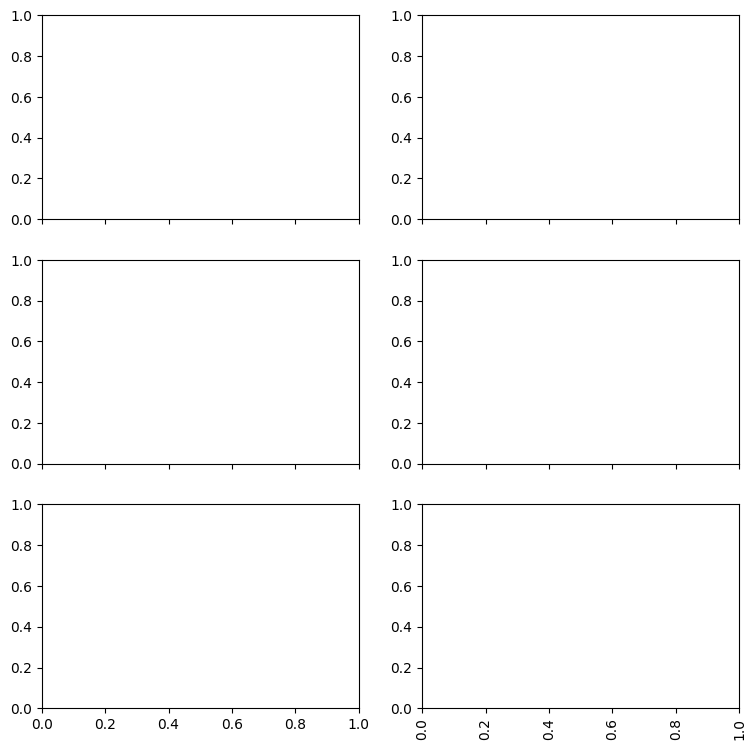

In [ ]:
# # plt.figure(figsize=(10,10))
# plt.plot(df.index, df['3db BeamWidth'])
# plt.xticks(rotation=90)
# plt.xlabel("Frequency")  # add X-axis label
# plt.ylabel("3dB BW or HPBW(dB)")  # add Y-axis label
# plt.title("3dB BW @ Different Frequencies")  # add title
# plt.show()

# # plt.figure(figsize=(10,10))
# plt.plot(df.index, df['Gain'])
# plt.xticks(rotation=90)
# plt.xlabel("Frequency")  # add X-axis label
# plt.ylabel("Gain(dB)")  # add Y-axis label
# plt.title("Gain @ Different Frequencies")  # add title
# plt.show()

# plt.figure(figsize=(10,10))
# plt.plot(df.index, df['BeamSquint'])
# plt.xticks(rotation=90)
# plt.xlabel("X-axis")  # add X-axis label
# plt.ylabel("Angle(Degree)")  # add Y-axis label
# plt.title("Beamsquint @ Different Frequencies")  # add title
# plt.show()


fig, axs = plt.subplots(3,2,sharex=True, figsize=(9, 9))
plt.xticks(rotation=90)
axs[0,0].plot(df.index, df['Gain'])
axs[1,0].plot(df.index, df['BeamSquint'])
axs[2,0].plot(df.index, df['3db BeamWidth'])
axs[0,1].plot(df1.index, df1['Gain'])
axs[1,1].plot(df1.index, df1['BeamSquint'])
axs[2,1].plot(df1.index, df1['3db BeamWidth'])


# fig, axs = plt.subplots(3,sharex=True, figsize=(9, 9))
# plt.xticks(rotation=90)
# axs[0].plot(df1.index, df1['Gain'])
# axs[1].plot(df1.index, df1['BeamSquint'])
# axs[2].plot(df1.index, df1['3db BeamWidth'])

# Experimentation

In [ ]:
AZI_H1 = pd.read_csv('/content/drive/MyDrive/DATA Raw/Azimuth H1.csv', sep= ',', header=0)

In [ ]:
AZI_H1.iloc[9,:]

In [ ]:
df = AZI_H1[10:]

In [ ]:
df.columns = AZI_H1.iloc[9]

In [ ]:
df.head()

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df

# Data Manipulation Task 3